In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataaset
df = pd.read_csv("insuranceFraud.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
# Dataset Top rows

df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1406.91,MD,MALE,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22,MD,MALE,machine-op-inspct,other-relative,Vehicle Theft,?,Minor Damage,Police,?,?,Y
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,1413.14,PhD,FEMALE,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1415.74,PhD,FEMALE,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,?,NO,Y
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,1583.91,Associate,MALE,sales,unmarried,Vehicle Theft,?,Minor Damage,None,NO,NO,N


In [5]:
# Dataset Last Rows
df.tail()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
995,3,1000,0,0,0,20,1,0,1,17440,8720,61040,1310.80,Masters,FEMALE,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,?,N
996,285,1000,0,70900,0,23,1,2,3,18080,18080,72320,1436.79,PhD,FEMALE,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,?,N
997,130,500,3000000,35100,0,4,3,2,3,7500,7500,52500,1383.49,Masters,FEMALE,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,?,YES,N
998,458,2000,5000000,0,0,2,1,0,1,5220,5220,36540,1356.92,Associate,MALE,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,?,YES,N
999,456,1000,0,0,0,6,1,0,3,460,920,3680,766.19,Associate,FEMALE,sales,husband,Parked Car,?,Minor Damage,Police,?,?,N


# Missing Values

In [120]:
X.shape ,Y.shape

((1000, 23), (1000,))

In [121]:
catg_features=[col for col in X.columns if X[col].dtypes=='object']
cont_features=[col for col in X.columns if X[col].dtypes!='object']

In [122]:
catg_features

['insured_education_level',
 'insured_sex',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available']

In [123]:
cont_features

['months_as_customer',
 'policy_deductable',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'policy_annual_premium']

In [124]:
len(catg_features) + len(cont_features)

23

# Continuous Fetaures

# Remaining catrgorical are Nominal, Lets encode them

In [129]:
X=pd.get_dummies(X,drop_first=True)

In [130]:
X.shape  , Y.shape

((1000, 52), (1000,))

# Balancing Data:  SMOTE / Over Sampling

In [131]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

In [132]:
x.shape , y.shape

((1506, 52), (1506,))

In [133]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: Target, dtype: object

In [134]:
x.to_csv("encoded-dataset.csv")

# Macine Learning

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [136]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    

Best accuracy is  0.6305309734513275 on Random State = 172


In [137]:
# Use, Random state= 8

In [138]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=8,test_size=.3)

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
LR_model= LogisticRegression()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()


model=[LR_model,DT_model,SV_model,KNR_model,XGB_model,SGH_model,Bag_model ]

In [159]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred), 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)

Confusion Matrix of  LogisticRegression()  is 
 [[131 118]
 [ 65 138]]
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[204  45]
 [ 38 165]]
Confusion Matrix of  SVC()  is 
 [[  0 249]
 [  0 203]]
Confusion Matrix of  KNeighborsClassifier()  is 
 [[145 104]
 [ 36 167]]
Confusion Matrix of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)  is 


In [160]:
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

,Model,Accuracy,F1 Score
0,LogisticRegression(),59.51,0.60
1,DecisionTreeClassifier(),81.64,0.80
2,SVC(),44.91,0.62
3,KNeighborsClassifier(),69.03,0.70
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",87.61,0.86
5,SGDClassifier(),54.65,0.62
6,(DecisionTreeClassifier(random_state=135439159...,87.17,0.85


# Cross Validation

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
acc=[]
cross=[]
diff=[]
for i in model:
    acc.append(accuracy_score(y_test,i.predict(x_test))*100)
    cross.append(cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    diff.append((accuracy_score(y_test,i.predict(x_test))*100)- (cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100))
    
pd.DataFrame({'Model':model,'Accuracy':acc,'Cross Validation':cross,'Difference':diff})

,Model,Accuracy,Cross Validation,Difference
0,LogisticRegression(),59.513274,56.906119,2.607156
1,DecisionTreeClassifier(),81.637168,80.622429,0.882289
2,SVC(),44.911504,52.257376,-7.345872
3,KNeighborsClassifier(),69.026549,70.120129,-1.093581
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",87.610619,83.942708,3.667912
5,SGDClassifier(),54.646018,52.916988,1.391964
6,(DecisionTreeClassifier(random_state=135439159...,87.168142,84.604959,3.424990


In [164]:
accuracy=[]
f1=[]
cross=[]

for m in model:
    m.fit(x_train,y_train)
    
    pred= m.predict(x_test)
  
    f1.append(round(f1_score(y_test,pred), 2))
    cross.append(cross_val_score(i,x,y,cv=5, scoring='f1').mean()*100)
    
pd.DataFrame({'Model':model,'F1':f1,'Cross Validation':cross})

,Model,F1,Cross Validation
0,LogisticRegression(),0.60,82.315735
1,DecisionTreeClassifier(),0.80,81.157241
2,SVC(),0.62,79.538007
3,KNeighborsClassifier(),0.70,82.103310
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.86,82.104505
5,SGDClassifier(),0.46,82.816620
6,(DecisionTreeClassifier(random_state=498771478...,0.85,82.010894


## Extreme Gradient BoostingClassifier()  Hypertuning

In [166]:
# Lets try to hypertune this algo.


In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
         'n_estimators':[5,50,100,200,300,400],
         "max_depth"        : [ 3, 4, 5, 6, 8]
          }

In [169]:
GCV= GridSearchCV(XGB_model,params,cv=5,scoring='accuracy', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...elta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                    

In [152]:
GCV.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}

In [153]:
pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,pred)

0.8672566371681416

# Confusion Matrix

<AxesSubplot:>

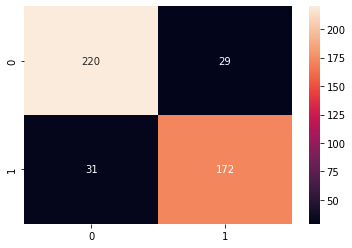

In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

# AUC ROC plot

In [155]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

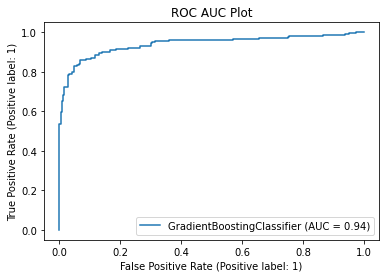

In [156]:
plot_roc_curve(XGB_model,x_test,y_test)
plt.title('ROC AUC Plot')

# Saving the Model

In [157]:
import pickle
pickle.dump(GCV,open("final-output.pkl","wb"))